# 티스토리 코드
https://zephyrus1111.tistory.com/193

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans

## K-means clustering

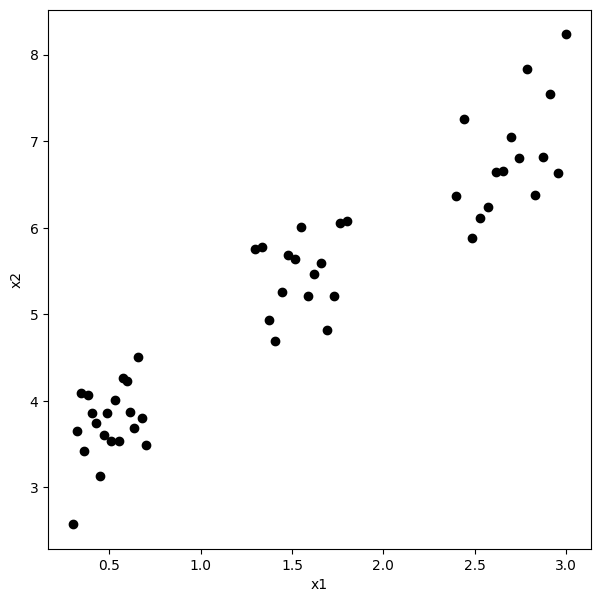

In [9]:
np.random.seed(100)
num_data = 50
 
x11 = np.linspace(0.3,0.7,20)
x12 = np.linspace(1.3,1.8,15)
x13 = np.linspace(2.4,3,15)
x1 = np.concatenate((x11,x12,x13),axis=None)
error = np.random.normal(1,0.5,num_data)
x2 = 1.5*x1+2+error

fig = plt.figure(figsize=(7,7))
fig.set_facecolor('white')
plt.scatter(x1, x2, color='k')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [10]:
X = np.stack([x1, x2], axis=1)
init = np.array([[2. , 4. ], [1. , 5. ], [2.5, 6. ]])
 
kmeans = KMeans(n_clusters=3, init=init)
kmeans.fit(X)
labels = kmeans.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2])

## Silhouette score

원 글 : https://zephyrus1111.tistory.com/193

실루엣 계수($\text{SC}$, silhouette coefficient)는, 군집화가 잘 되었는지를 평가하는 지표이다.
이때, $-1\le\text{SC}\le1$이고 $\text{SC}$의 값이 클수록 군집화가 잘 되었다는 의미가 된다.
서로다른 여러 종류의 군집화들에 대하여 실루엣 계수들을 계산한 후, 실루엣 계수가 가장 높은 군집화를 가장 좋은 군집화라고 판단할 수 있다.
$\text{SC}$를 정의하기 위해서는 $a(i)$, $b(i)$, $s(i)$, $\tilde s(I)$를 다음과 같이 정의해야 한다.

(1) 주어진 데이터가 군집화 알고리즘(e.g. K-means, Gaussian Mixture Model)을 통하여 군집화가 되어 있다고 가정하고, 군집의 갯수를 $K$라고 하자.
$I$번째 클러스터 $C_I$에 속하는 $i$번째 데이터는 $x_i$와 같이 써야 맞겠지만, 편의상 그냥 $i$라고 쓰자.
만약 $|C_I|\ne1$이면,
$$a(i)=\frac1{|C_I|-1}\sum_{j\in C_I,j\ne i}d(i,j)$$
로 정의한다.
이때, $d(i,j)$는 $i$, $j$번째 데이터 간의 유클리드 거리이다.
즉 $a(i)$는 $i$번째 데이터와, $i$번째 데이터가 속한 클러스터 $C_I$의 모든 데이터들 사이의 거리의 평균으로, **$\boldsymbol i$번째 데이터와 모(母)클러스터 $C_I$ 사이의 거리**라고 생각할 수 있다.
즉
$$a(i)=d\left(i,C_I\right)$$
이다.

(2) 이번에는
$$b(i)=\min_{J\ne I}\frac1{|C_J|}\sum_{j\in C_J}d(i,j)$$
로 정의한다.
즉, $b(i)$는 $i$번째 데이터와, $i$번째 데이터와 가장 가까운 클러스터 $C_J$의 모든 데이터들 사이의 거리의 평균으로, **$\boldsymbol i$번째 데이터와 인접 클러스터 $C_J$ 사이의 거리**라고 생각할 수 있다.
즉
$$b(i)=\min_{J\ne I}d\left(i,C_J\right)$$
이다.
따라서, 모든 $i$에 대하여 $a(i)\ge0$, $b(i)\ge0$이다.
이때, $a(i)=0$(또는 $b(i)=0$)인 경우는, $C_I$(또는 $C_J$)에 속하는 모든 데이터들이 $i$로 일치하는 경우이다.
또한, 군집화가 정상적으로 진행되었다면, $J\ne I$에 대하여 $d(i,C_I)<d(i,C_J)$일 것이고, 따라서 $a(i)<b(i)$일 것이다.

(3) 또한
$$s(i)=\begin{cases}
\frac{b(i)-a(i)}{\max\{a(i),b(i)\}}&\text{if }|C_I|>1\\
0&\text{if }|C_I|=1
\end{cases}$$
로 정의하자.
$|C_I|>1$인 경우, $s(i)$는 다음과 같이 바꿔 쓸 수 있다.
$$
s(i)=\begin{cases}
1-\frac{a(i)}{b(i)}&\text{if }a(i)<b(i)\\
0&\text{if }a(i)=b(i)\\
\frac{b(i)}{a(i)}-1&\text{if }a(i)>b(i)
\end{cases}
$$
이다.
$a<b$이면 $0\le\frac ab<1$이고 $0<s(i)\le1$이다.
$a>b$이면 $0\le\frac ba<1$이고 $-1\le s(i)<0$이다.
따라서, $-1\le s(i)\le1$이다.
$s(i)$는 **$\boldsymbol i$번째 데이터를 기준으로, 군집화가 잘 이루어져 있는지를 평가하는 지표**라고 해석할 수 있고, $s(i)$가 1에 가까울 수록 군집화가 잘 되었다는 의미이다.

(4) 다음으로, $\tilde s(I)$의 값을
$$\tilde s(I)=\frac1{|C_I|}\sum_{i=1}^{|C_I|}s(i)$$
로 정의하자.
이것은 **$\boldsymbol I$번째 군집을 기준으로, 군집화가 잘 이루어져 있는지를 평가하는 지표**라고 해석할 수 있다.
원 글에서는 표기의 혼란을 피하기 위해 $s$ 대신에 $\tilde s$를 쓴 것 같다.
하지만 굳이 $J$를 쓸 필요는 없을 것 같아서 $I$로 써보았다.

(5) 마지막으로, $\text{SC}$의 값을
$$\text{SC}=\max_{1\le I\le K}\tilde s(I)$$
로 정의하고 이것을 실루엣 계수(the silhouette coefficient)라고 부르자.
앞의 모든 부분들은 잘 이해가 되었는데, 여기에서 왜 굳이 $\max$를 쓰는지 모르겠다.
즉, $\tilde s(I)$의 최댓값으로서 $\text{SC}$를 정의하고 있다.
$\text{SC}$는 **군집화가 잘 되었는지를 평가하는 지표**로서 활용될 것이다.
그렇다면 최댓값을 취하는 대신에, 평균을 취하는 것이 더 그럴듯해보이기도 한다.
당연히 $-1\le\text{SC}\le1$이고 $\text{SC}$의 값이 클수록 군집화가 잘 되었다고 판단한다.

In [ ]:
# np.linalg.norm는 euclidean norm을 의미한다.
a = np.array([1,2])
b = np.array([4,6])
np.linalg.norm(a-b)

In [11]:
def get_silhouette_results(X, labels):
    def get_sum_distance(target_x, target_cluster):
        res = np.sum([np.linalg.norm(target_x-x) for x in target_cluster])
        return res
    
    '''
    각 데이터 포인트를 돌면서 a(i), b(i)를 계산
    그리고 s(i)를 계산한다.
    
    마지막으로 Silhouette(실루엣) Coefficient를 계산한다.
    '''
    uniq_labels = np.unique(labels)
    silhouette_val_list = []
    for i in range(len(labels)):
        target_data = X[i]
 
        ## calculate a(i)
        target_label = labels[i]
        target_cluster_data_idx = np.where(labels==target_label)[0]
        if len(target_cluster_data_idx) == 1:
            silhouette_val_list.append(0)
            continue
        else:
            target_cluster_data = X[target_cluster_data_idx]
            temp1 = get_sum_distance(target_data, target_cluster_data)
            a_i = temp1/(target_cluster_data.shape[0]-1)
 
        ## calculate b(i)
        b_i_list = []
        label_list = uniq_labels[np.unique(labels) != target_label]
        for ll in label_list:
            other_cluster_data_idx = np.where(labels==ll)[0]
            other_cluster_data = X[other_cluster_data_idx]
            temp2 = get_sum_distance(target_data, other_cluster_data)
            temp_b_i = temp2/other_cluster_data.shape[0]
            b_i_list.append(temp_b_i)
 
        b_i = min(b_i_list)
        s_i = (b_i-a_i)/max(a_i, b_i)
        silhouette_val_list.append(s_i)
 
    silhouette_coef_list = []
    for ul in uniq_labels:
        temp3 = np.mean([s for s, l in zip(silhouette_val_list, labels) if l == ul])
        silhouette_coef_list.append(temp3)
 
    silhouette_coef = max(silhouette_coef_list)
    return (silhouette_coef, np.array(silhouette_val_list))

In [12]:
silhouette_coef, silhouette_val_list = get_silhouette_results(X, labels)
print(silhouette_coef)

0.7434423527756951


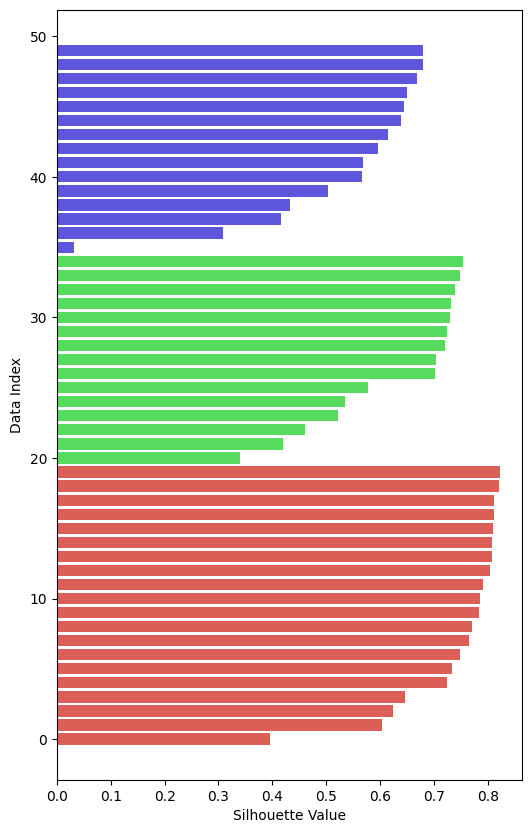

In [14]:
import seaborn as sns
 
## 각 클러스터별로 Silhouette(실루엣) 값을 정렬한다.
uniq_labels = np.unique(labels)
sorted_cluster_svl = []
rearr_labels = []
for ul in uniq_labels:
    labels_idx = np.where(labels==ul)[0]
    target_svl = silhouette_val_list[labels_idx]
    sorted_cluster_svl += sorted(target_svl)
    rearr_labels += [ul]*len(target_svl)
 
colors = sns.color_palette('hls', len(uniq_labels))
color_labels = [colors[i] for i in rearr_labels]
 
fig = plt.figure(figsize=(6, 10))
fig.set_facecolor('white')
plt.barh(range(len(sorted_cluster_svl)), sorted_cluster_svl, color=color_labels)
plt.ylabel('Data Index')
plt.xlabel('Silhouette Value')
plt.show()

In [15]:
from sklearn.metrics import silhouette_score
 
silhouette_score(X, labels, metric='euclidean')

0.6455726169492848

In [16]:
np.mean(silhouette_val_list)

0.6455726169492846

# 프로젝트에 적용

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
import seaborn

## K-means clustering

In [19]:
collected_data = pd.read_csv("../data/data_final/2216_1230_collected_data.csv")
collected_data.set_index("지역", inplace=True)
collected_data

,쏘카존수,녹지,주거,공업,상업,인구,대학교 개수,아파트수,지하철역 개수
지역,,,,,,,,,
가평군,7,1.000000,0.000000,0.000000,0.000000,62197,1,39,4
고양시 덕양구,48,0.656250,0.343750,0.000000,0.000000,487874,6,274,9
고양시 일산동구,51,0.461538,0.461538,0.000000,0.076923,296590,1,133,6
고양시 일산서구,29,0.500000,0.375000,0.000000,0.125000,290738,0,140,4
과천시,3,0.500000,0.500000,0.000000,0.000000,77775,1,15,5
광명시,28,0.222222,0.666667,0.000000,0.111111,288182,0,89,3
광주시,16,0.923077,0.076923,0.000000,0.000000,391704,11,129,4
구리시,19,0.500000,0.500000,0.000000,0.000000,188876,0,111,2
군포시,10,0.333333,0.444444,0.222222,0.000000,266531,7,155,7


In [27]:
X = np.array(collected_data)
X.shape

(42, 9)

In [30]:
kmeans = KMeans(n_clusters=3, init='k-means++')
kmeans.fit(X)
labels = kmeans.labels_
labels

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 2, 1, 2, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 2])

## Silhouette score

In [31]:
def get_silhouette_results(X, labels):
    def get_sum_distance(target_x, target_cluster):
        res = np.sum([np.linalg.norm(target_x-x) for x in target_cluster])
        return res
    
    '''
    각 데이터 포인트를 돌면서 a(i), b(i)를 계산
    그리고 s(i)를 계산한다.
    
    마지막으로 Silhouette(실루엣) Coefficient를 계산한다.
    '''
    uniq_labels = np.unique(labels)
    silhouette_val_list = []
    for i in range(len(labels)):
        target_data = X[i]
 
        ## calculate a(i)
        target_label = labels[i]
        target_cluster_data_idx = np.where(labels==target_label)[0]
        if len(target_cluster_data_idx) == 1:
            silhouette_val_list.append(0)
            continue
        else:
            target_cluster_data = X[target_cluster_data_idx]
            temp1 = get_sum_distance(target_data, target_cluster_data)
            a_i = temp1/(target_cluster_data.shape[0]-1)
 
        ## calculate b(i)
        b_i_list = []
        label_list = uniq_labels[np.unique(labels) != target_label]
        for ll in label_list:
            other_cluster_data_idx = np.where(labels==ll)[0]
            other_cluster_data = X[other_cluster_data_idx]
            temp2 = get_sum_distance(target_data, other_cluster_data)
            temp_b_i = temp2/other_cluster_data.shape[0]
            b_i_list.append(temp_b_i)
 
        b_i = min(b_i_list)
        s_i = (b_i-a_i)/max(a_i, b_i)
        silhouette_val_list.append(s_i)
 
    silhouette_coef_list = []
    for ul in uniq_labels:
        temp3 = np.mean([s for s, l in zip(silhouette_val_list, labels) if l == ul])
        silhouette_coef_list.append(temp3)
 
    silhouette_coef = max(silhouette_coef_list)
    return (silhouette_coef, np.array(silhouette_val_list))

In [32]:
silhouette_coef, silhouette_val_list = get_silhouette_results(X, labels)
print(silhouette_coef)

0.7009155837342226


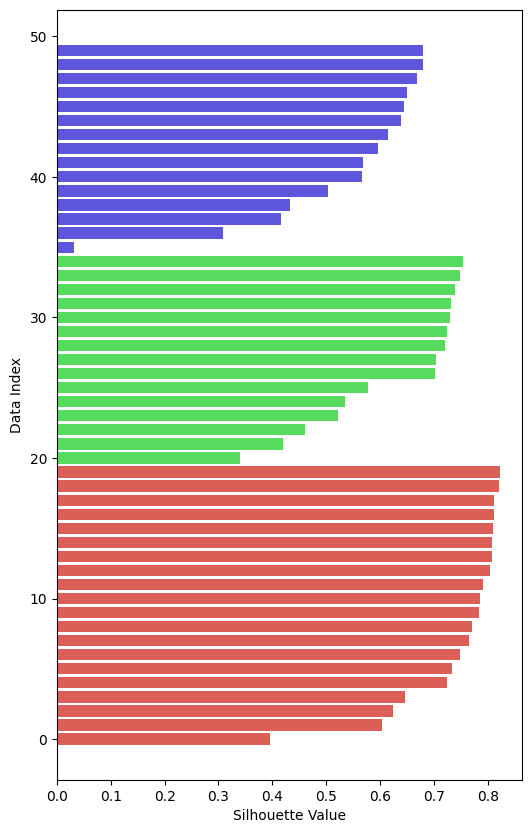

In [14]:
import seaborn as sns
 
## 각 클러스터별로 Silhouette(실루엣) 값을 정렬한다.
uniq_labels = np.unique(labels)
sorted_cluster_svl = []
rearr_labels = []
for ul in uniq_labels:
    labels_idx = np.where(labels==ul)[0]
    target_svl = silhouette_val_list[labels_idx]
    sorted_cluster_svl += sorted(target_svl)
    rearr_labels += [ul]*len(target_svl)
 
colors = sns.color_palette('hls', len(uniq_labels))
color_labels = [colors[i] for i in rearr_labels]
 
fig = plt.figure(figsize=(6, 10))
fig.set_facecolor('white')
plt.barh(range(len(sorted_cluster_svl)), sorted_cluster_svl, color=color_labels)
plt.ylabel('Data Index')
plt.xlabel('Silhouette Value')
plt.show()

In [15]:
from sklearn.metrics import silhouette_score
 
silhouette_score(X, labels, metric='euclidean')

0.6455726169492848

In [16]:
np.mean(silhouette_val_list)

0.6455726169492846

## finding the optimal number of clusters

In [74]:
nl = np.arange(2,11)
for n in nl:
    kmeans = KMeans(n_clusters=n, init='k-means++')
    kmeans.fit(X)
    labels = kmeans.labels_
    print("the number of clusters :", n, "the silhouette score", silhouette_score(X, labels, metric='euclidean'))

the number of clusters : 2 the silhouette score 0.612062801254198
the number of clusters : 3 the silhouette score 0.5752099228253952
the number of clusters : 4 the silhouette score 0.5571051561510704
the number of clusters : 5 the silhouette score 0.5798274527662939
the number of clusters : 6 the silhouette score 0.5881684432823923
the number of clusters : 7 the silhouette score 0.5704959914317346
the number of clusters : 8 the silhouette score 0.5609465045057602
the number of clusters : 9 the silhouette score 0.5518493961589718
the number of clusters : 10 the silhouette score 0.5334945739681187


# sklearn 코드

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [2]:
# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)  # For reproducibility

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.5662344175321901
For n_clusters = 6 The average silhouette_score is : 0.4358297989156284


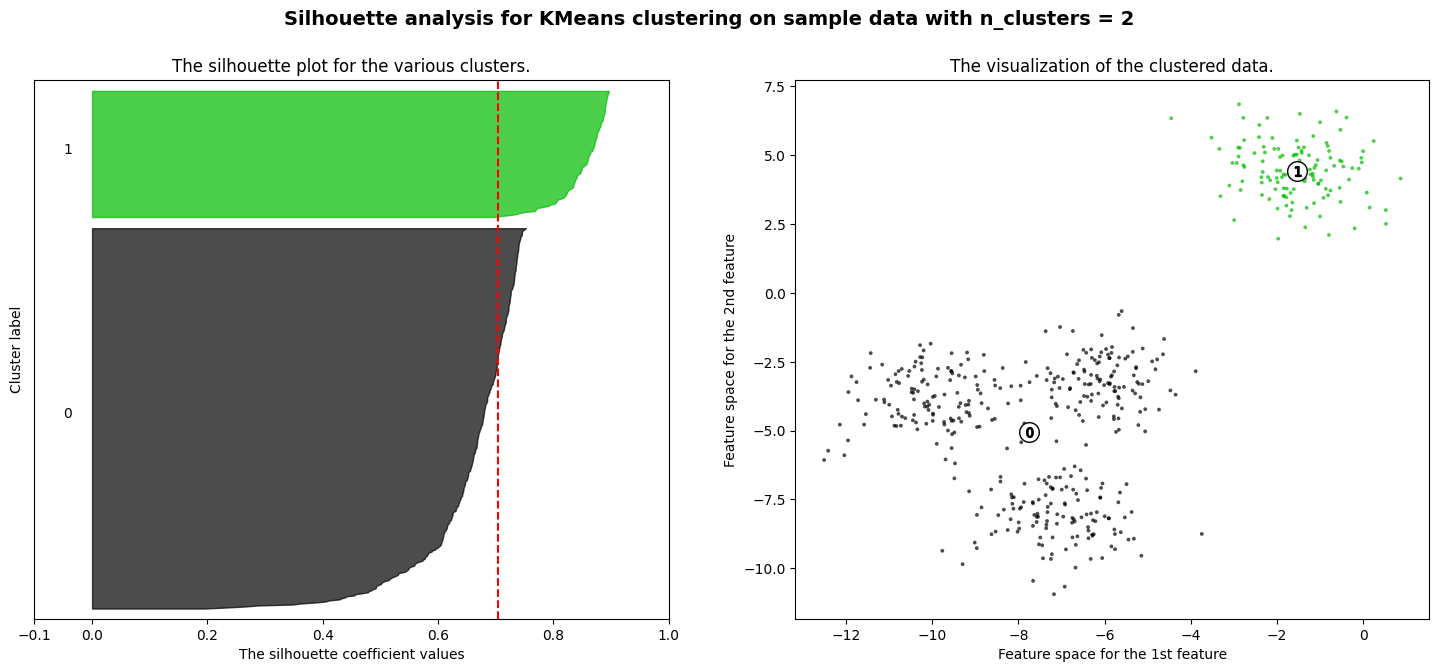

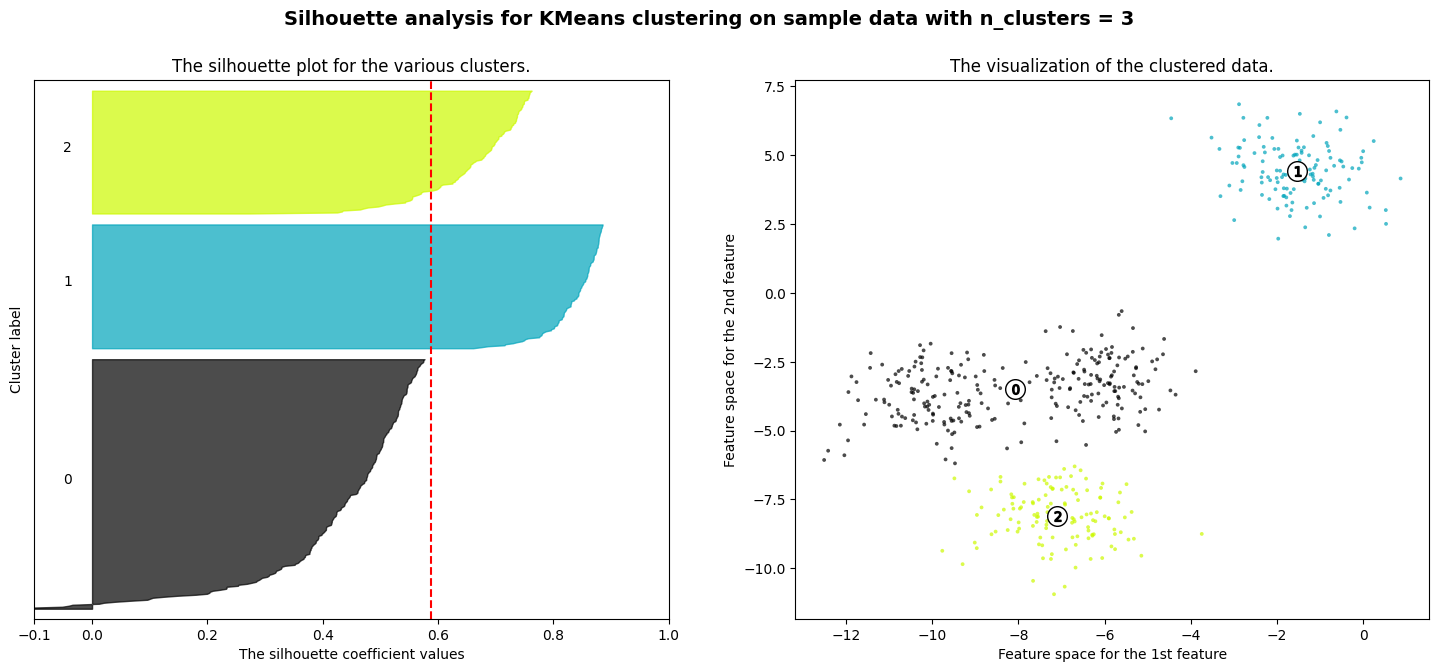

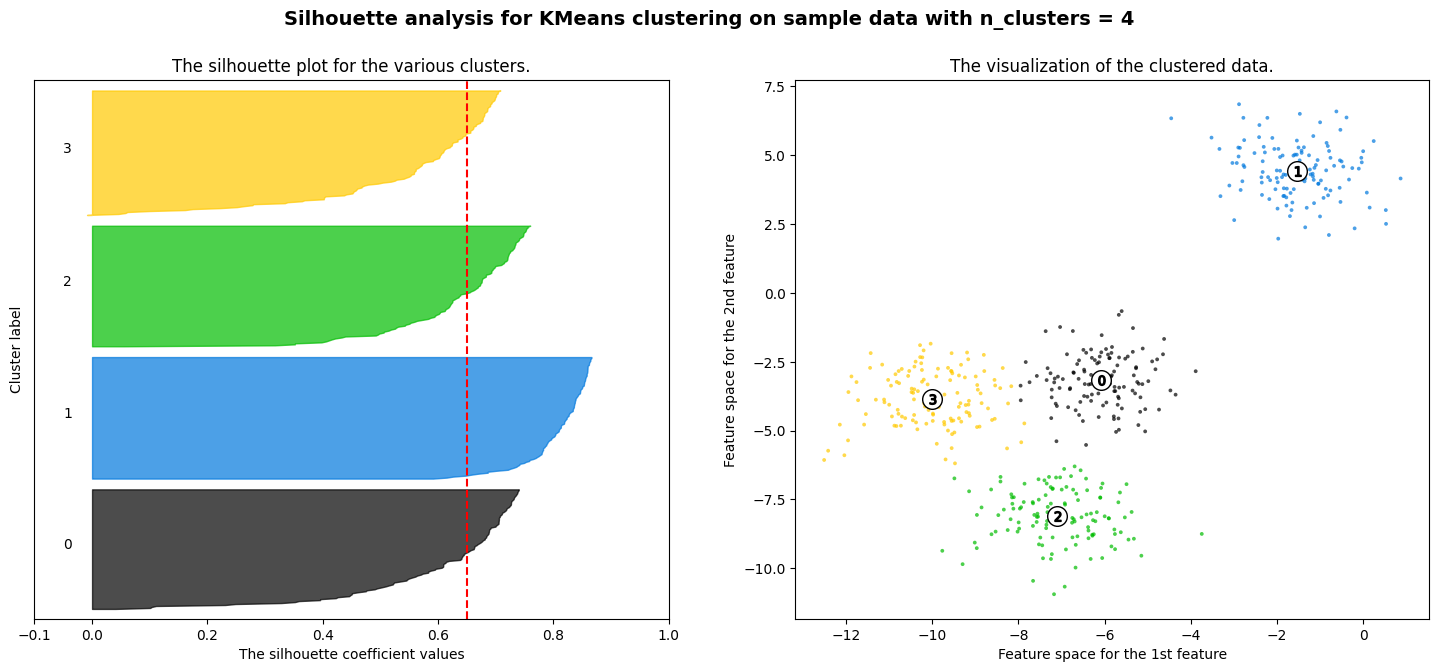

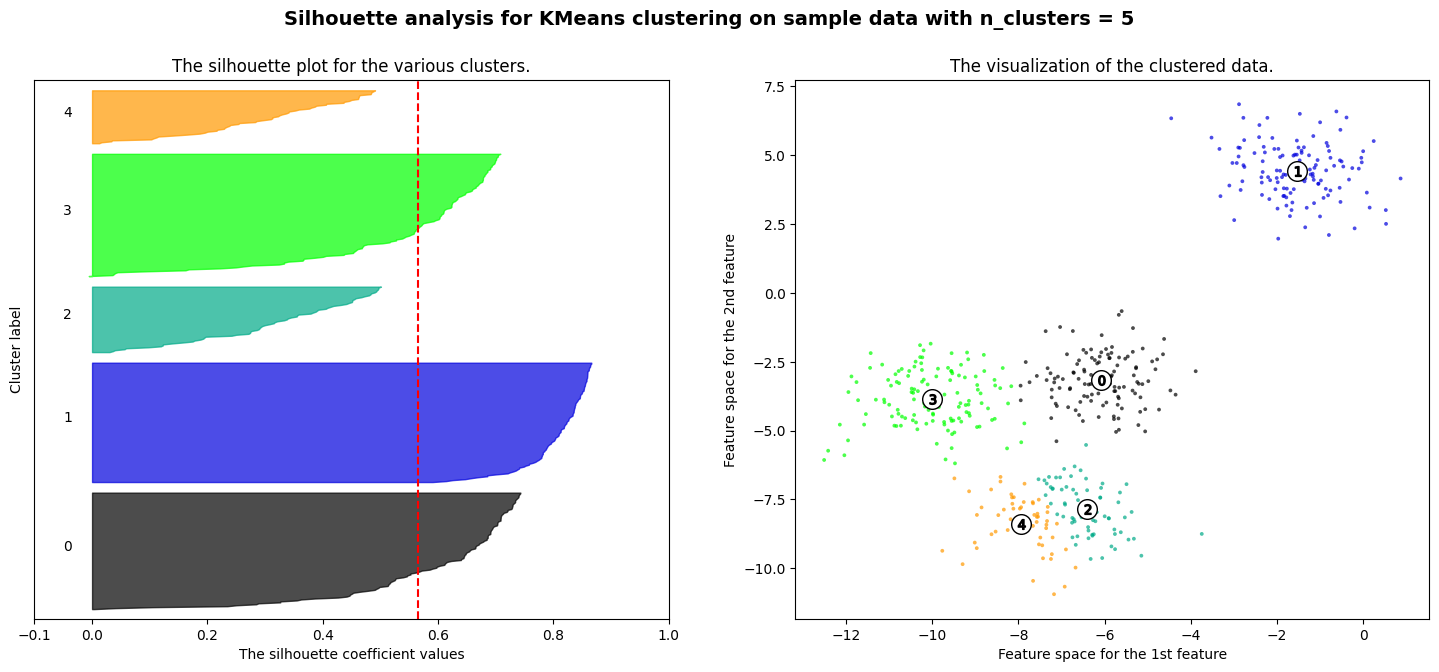

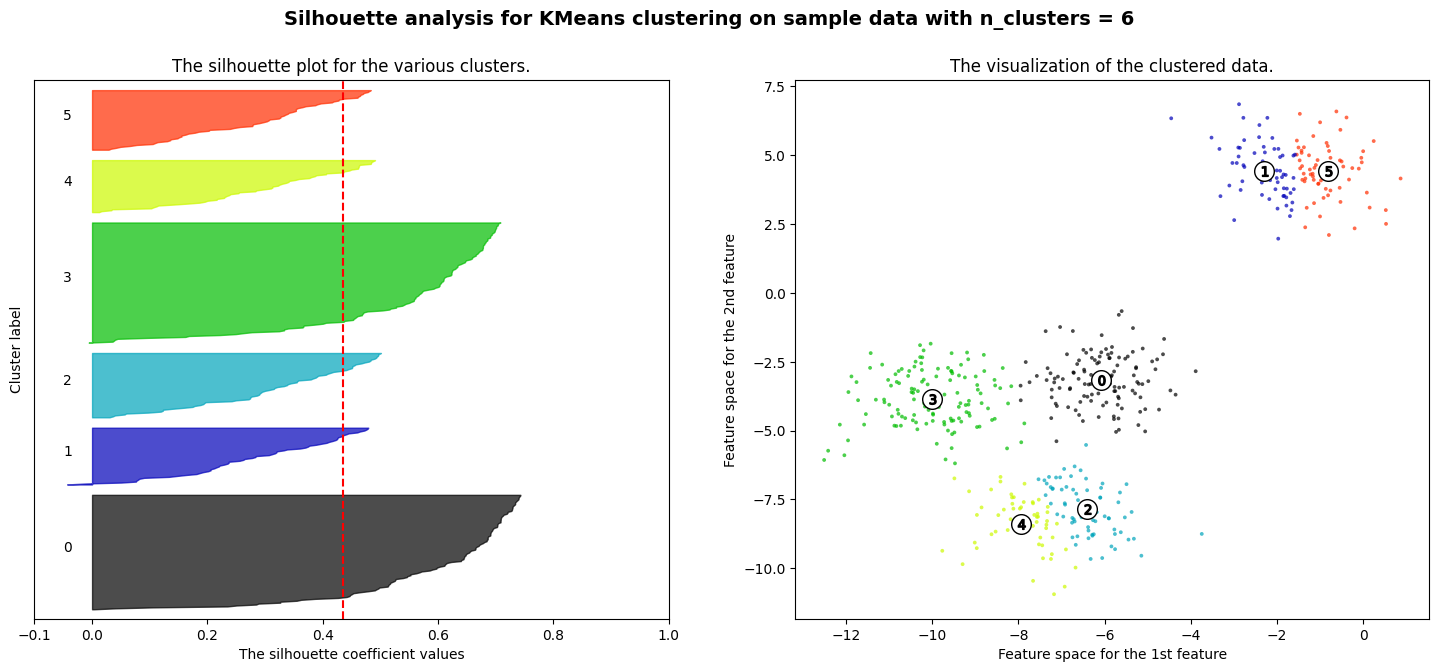

In [3]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()


# 프로젝트에 적용

## 모든 feature 사용

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans

In [16]:
collected_data = pd.read_csv("../data/data_final/2216_1230_collected_data.csv")
collected_data.set_index("지역", inplace=True)
collected_data.columns

Index(['쏘카존수', '녹지', '주거', '공업', '상업', '인구', '대학교 개수', '아파트수', '지하철역 개수'], dtype='object')

For n_clusters = 2 The average silhouette_score is : 0.612062801254198
For n_clusters = 3 The average silhouette_score is : 0.5824849693513748
For n_clusters = 4 The average silhouette_score is : 0.5488932581162531
For n_clusters = 5 The average silhouette_score is : 0.5798274527662939
For n_clusters = 6 The average silhouette_score is : 0.5569474632401705


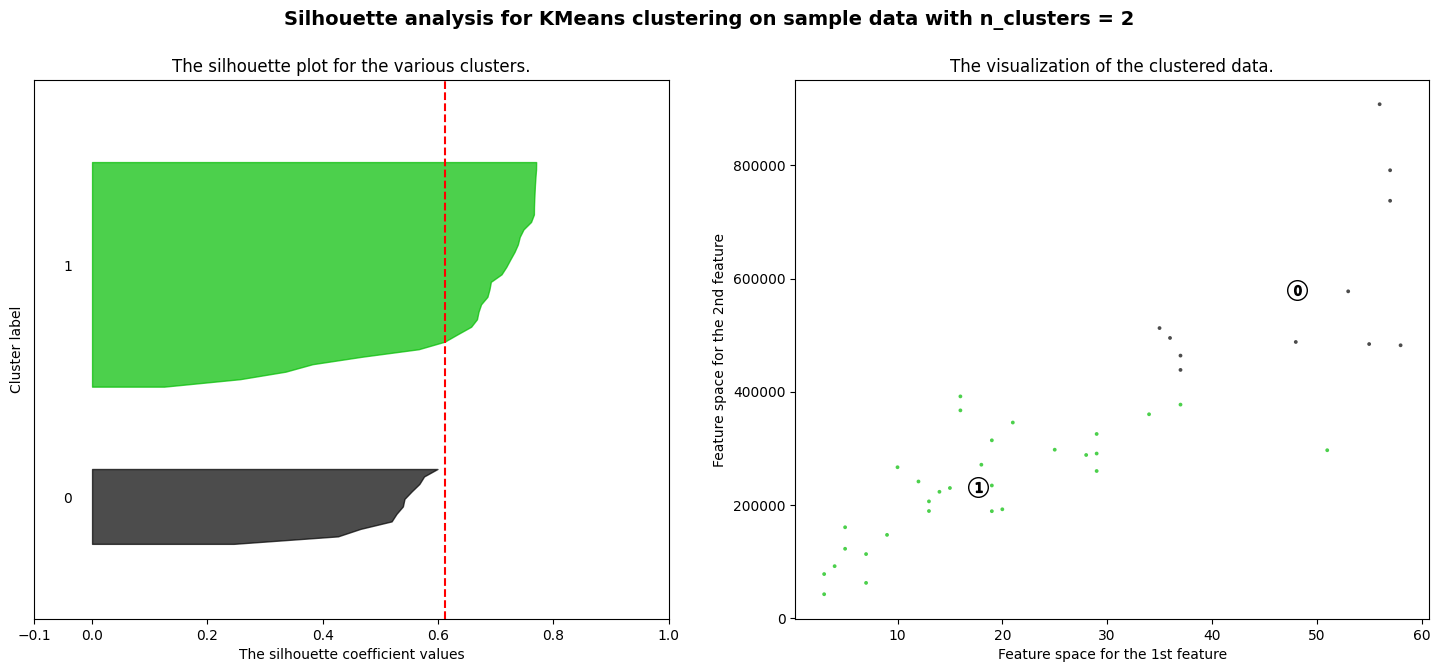

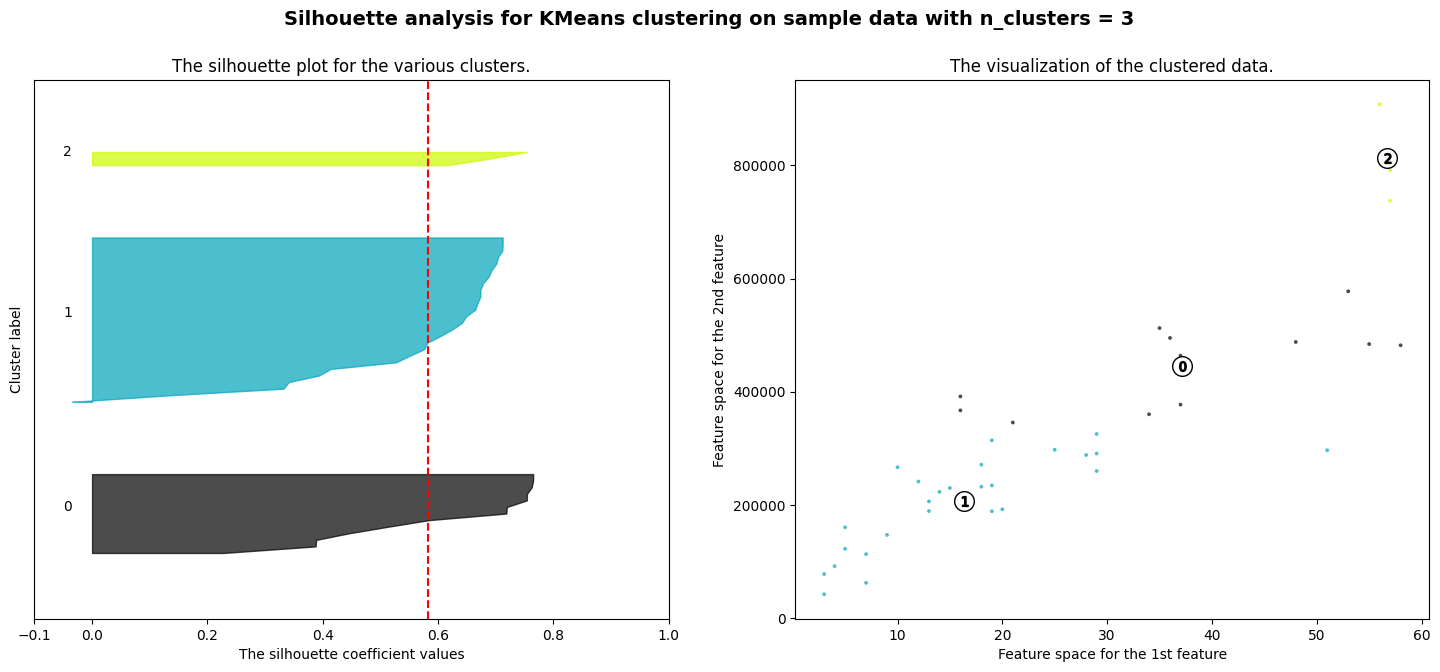

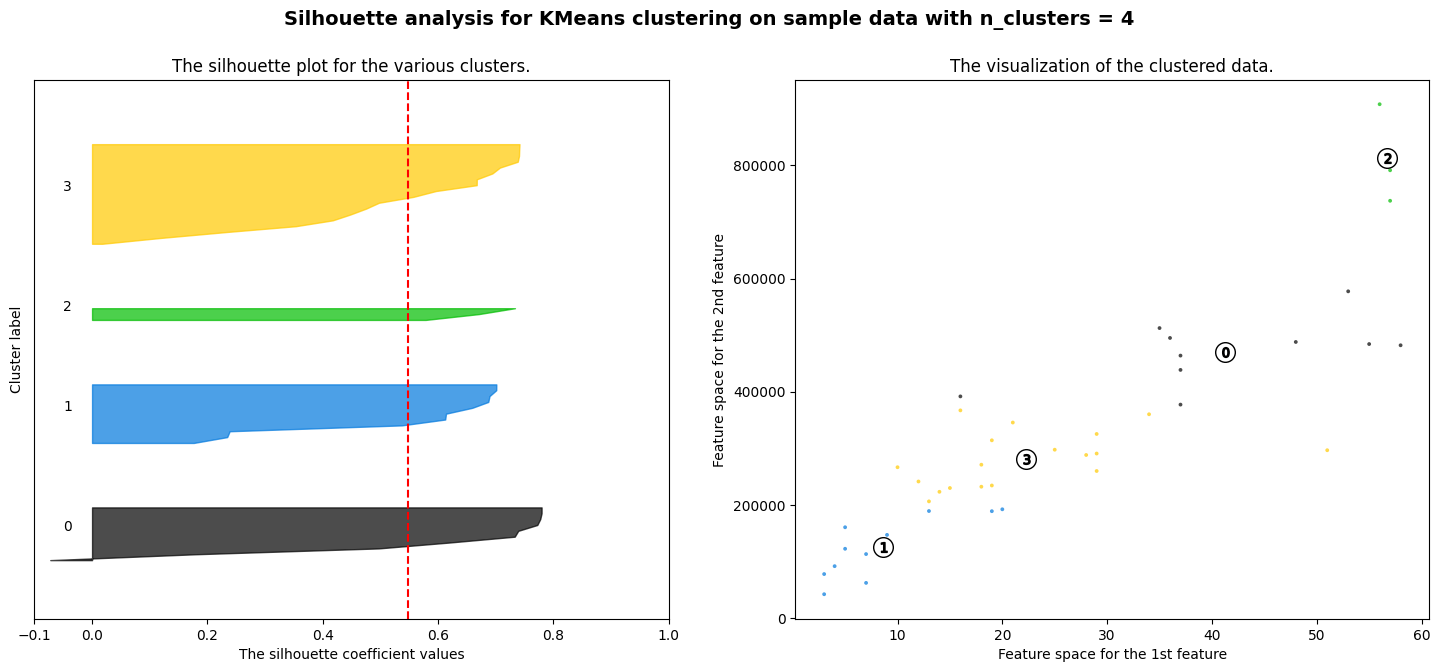

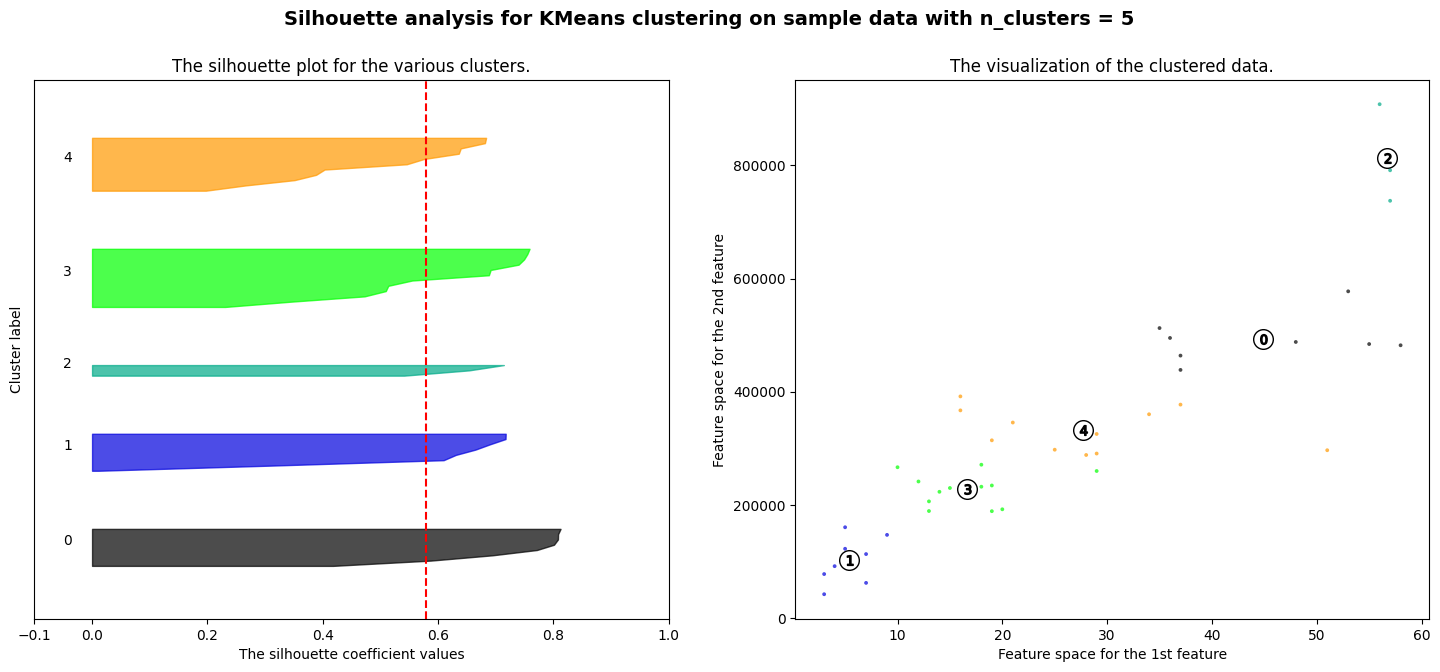

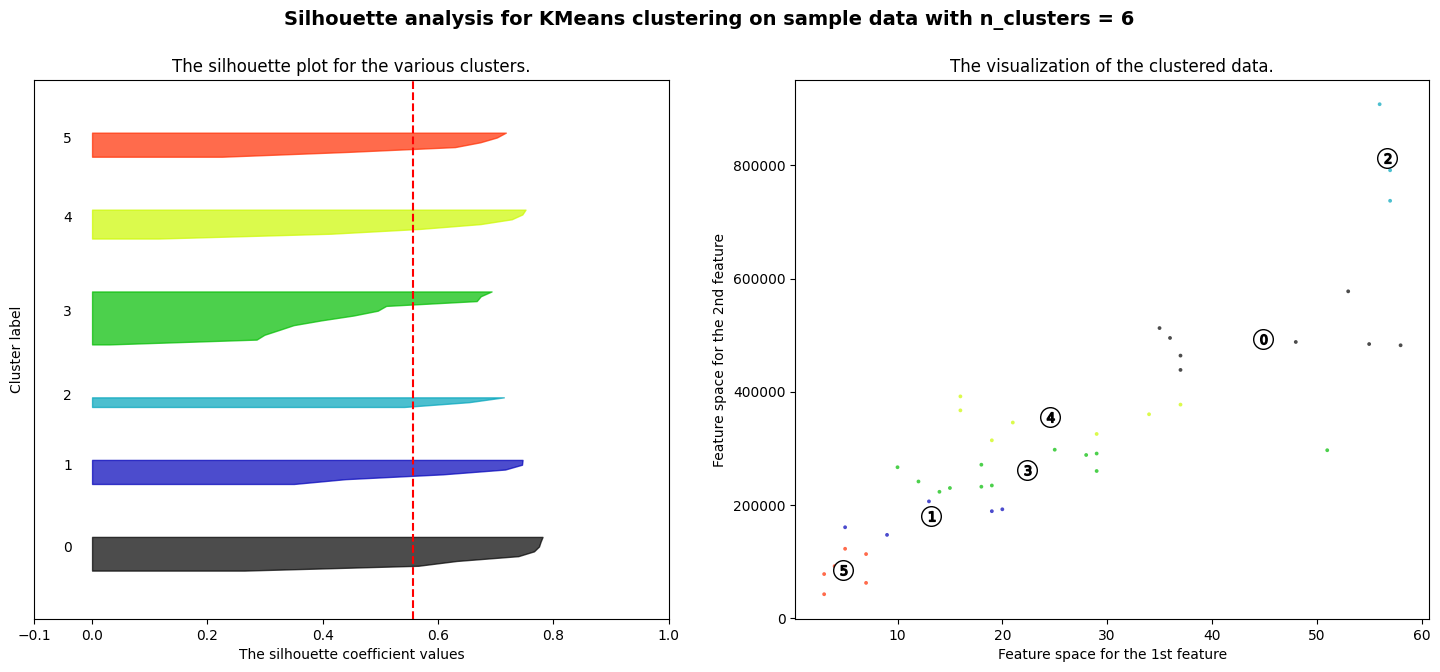

In [75]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()


silhouette coefficient 최대 : 0.612062801254198

In [48]:
clusterer = KMeans(n_clusters=2, n_init="auto", random_state=10)
cluster_labels = clusterer.fit_predict(X)
cluster_labels

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0])

In [64]:
print("군집1 : ",regions[np.where(cluster_labels==0)])
print("군집2 : ",regions[np.where(cluster_labels==1)])

군집1 :  ['고양시 덕양구' '김포시' '남양주시' '부천시' '성남시 분당구' '시흥시' '용인시 기흥구' '의정부시' '파주시' '평택시'
 '화성시']
군집2 :  ['가평군' '고양시 일산동구' '고양시 일산서구' '과천시' '광명시' '광주시' '구리시' '군포시' '동두천시'
 '성남시 수정구' '성남시 중원구' '수원시 권선구' '수원시 영통구' '수원시 장안구' '수원시 팔달구' '안산시 단원구'
 '안산시 상록구' '안성시' '안양시 동안구' '안양시 만안구' '양주시' '양평군' '여주시' '연천군' '오산시'
 '용인시 수지구' '용인시 처인구' '의왕시' '이천시' '포천시' '하남시']


## 다양한 feature 조합 사용

위에서 Silhouette method를 사용하여 적절한 클러스터 수를 찾아보았다.
feature들을 모두 사용했을 경우 가장 적절한 클러스터 수는 2개이다.
그리고 그 때의 실루엣 계수 silhouett coefficient (=silhouette value들의 평균)은 0.6121 정도로 계산된다.
내 생각에는 클러스터 수가 2개인 것이나, 실루엣 계수가 0.6121에 불과한 것은 별로 만족스러운 결과 같지가 않아 보인다.
그래서 다음과 같이, 가능한 feature들의 조합을 찾아보려고 한다.

현재 6종류의 feature들을 모아놓았다.
따라서, 가능한 feature들의 조합은 $2^6-1=63$개이다.

즉, feature들의 집합은
$$F=\{쏘카존수,토지용도,인구,대학교 개수, 아파트 수, 지하철역 개수\}$$
이어서 $|F|=6$이다.
가능한 feature의 조합 중 하나는 예를 들어서 $\{쏘카존수, 인구, 지하철역 개수\}$이다.
이 조합들을 세는 것은 집합 $F$의 부분집합 중 공집합이 아닌 집합의 개수를 세는 것과 같다.
따라서 그 개수는 $2^6-1=63$ 개 인 것이다.

그런데, feature들의 개수는 적어도 두 개 이상은 사용해야 할 것 같다. feature를 한 개 사용하면서 클러스터링을 하는 건 의미가 없을 것이다.
한편, 토지용도의 경우 네 개의 feature가 모여있는 셈이라 다루기가 까다롭다.
- 토지용도를 포함하는 조합 개수 : $2^5-5-1=26$
- 토지용도를 포함하지 않는 조합 개수 : $2^5-5-1=26$

즉, 고려해야 하는 모든 경우의 수는 52개이다.

In [25]:
import itertools
def powerset(lst):
    return [list(subset) for i in range(0, len(lst) + 1) for subset in itertools.combinations(lst, i)]
powerset([1,2,3])

[[], [1], [2], [3], [1, 2], [1, 3], [2, 3], [1, 2, 3]]

In [44]:
# 토지용도를 사용하지 않는 경우
# combinations of features without the landuse feature
F = ['쏘카존수', '인구', '대학교 개수', '아파트수', '지하철역 개수'] # features
f = np.array(F).reshape(-1,1).tolist()+[[]] # 1개 혹은 0개짜리 feature 조합
C = [combination for combination in powerset(F) if combination not in f] # 1개 혹은 0개짜리 feature 조합은 제거
C #2^5-1-5=26개

[['쏘카존수', '인구'],
 ['쏘카존수', '대학교 개수'],
 ['쏘카존수', '아파트수'],
 ['쏘카존수', '지하철역 개수'],
 ['인구', '대학교 개수'],
 ['인구', '아파트수'],
 ['인구', '지하철역 개수'],
 ['대학교 개수', '아파트수'],
 ['대학교 개수', '지하철역 개수'],
 ['아파트수', '지하철역 개수'],
 ['쏘카존수', '인구', '대학교 개수'],
 ['쏘카존수', '인구', '아파트수'],
 ['쏘카존수', '인구', '지하철역 개수'],
 ['쏘카존수', '대학교 개수', '아파트수'],
 ['쏘카존수', '대학교 개수', '지하철역 개수'],
 ['쏘카존수', '아파트수', '지하철역 개수'],
 ['인구', '대학교 개수', '아파트수'],
 ['인구', '대학교 개수', '지하철역 개수'],
 ['인구', '아파트수', '지하철역 개수'],
 ['대학교 개수', '아파트수', '지하철역 개수'],
 ['쏘카존수', '인구', '대학교 개수', '아파트수'],
 ['쏘카존수', '인구', '대학교 개수', '지하철역 개수'],
 ['쏘카존수', '인구', '아파트수', '지하철역 개수'],
 ['쏘카존수', '대학교 개수', '아파트수', '지하철역 개수'],
 ['인구', '대학교 개수', '아파트수', '지하철역 개수'],
 ['쏘카존수', '인구', '대학교 개수', '아파트수', '지하철역 개수']]

In [40]:
# 토지용도를 사용하는 경우
# combinations of features with the landuse feature
LU = ['녹지', '주거', '공업', '상업'] # land use feature
f = np.array(F+LU).reshape(-1,1).tolist()+[[]] # 1개 혹은 0개짜리 feature 조합
CL = [combination+LU for combination in powerset(F) if combination not in f] # 1개 혹은 0개짜리 feature 조합은 제거
CL #2^5-1-5=26개

[['쏘카존수', '인구', '녹지', '주거', '공업', '상업'],
 ['쏘카존수', '대학교 개수', '녹지', '주거', '공업', '상업'],
 ['쏘카존수', '아파트수', '녹지', '주거', '공업', '상업'],
 ['쏘카존수', '지하철역 개수', '녹지', '주거', '공업', '상업'],
 ['인구', '대학교 개수', '녹지', '주거', '공업', '상업'],
 ['인구', '아파트수', '녹지', '주거', '공업', '상업'],
 ['인구', '지하철역 개수', '녹지', '주거', '공업', '상업'],
 ['대학교 개수', '아파트수', '녹지', '주거', '공업', '상업'],
 ['대학교 개수', '지하철역 개수', '녹지', '주거', '공업', '상업'],
 ['아파트수', '지하철역 개수', '녹지', '주거', '공업', '상업'],
 ['쏘카존수', '인구', '대학교 개수', '녹지', '주거', '공업', '상업'],
 ['쏘카존수', '인구', '아파트수', '녹지', '주거', '공업', '상업'],
 ['쏘카존수', '인구', '지하철역 개수', '녹지', '주거', '공업', '상업'],
 ['쏘카존수', '대학교 개수', '아파트수', '녹지', '주거', '공업', '상업'],
 ['쏘카존수', '대학교 개수', '지하철역 개수', '녹지', '주거', '공업', '상업'],
 ['쏘카존수', '아파트수', '지하철역 개수', '녹지', '주거', '공업', '상업'],
 ['인구', '대학교 개수', '아파트수', '녹지', '주거', '공업', '상업'],
 ['인구', '대학교 개수', '지하철역 개수', '녹지', '주거', '공업', '상업'],
 ['인구', '아파트수', '지하철역 개수', '녹지', '주거', '공업', '상업'],
 ['대학교 개수', '아파트수', '지하철역 개수', '녹지', '주거', '공업', '상업'],
 ['쏘카존수', '인구', '대학교 개수', '아파트

### 군집화 결과

아래는 다양한 feature 조합에 대하여 군집화를 시행한 결과이다
아무리 조합해봐도 silhouette score가 최대가 되는 클러스터 수는 2개이다.

In [46]:
range_n_clusters = [2, 3, 4, 5, 6]
for c in C+CL:
    X = np.array(collected_data[c])
    print("combination of features :",c)
    for n_clusters in range_n_clusters:
        clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
        cluster_labels = clusterer.fit_predict(X)
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

combination of features : ['쏘카존수', '인구']
For n_clusters = 2 The average silhouette_score is : 0.6120628469382191
For n_clusters = 3 The average silhouette_score is : 0.582485160758293
For n_clusters = 4 The average silhouette_score is : 0.548893514311931
For n_clusters = 5 The average silhouette_score is : 0.5798279553462133
For n_clusters = 6 The average silhouette_score is : 0.5569481382530839
combination of features : ['쏘카존수', '대학교 개수']
For n_clusters = 2 The average silhouette_score is : 0.5619953284601567
For n_clusters = 3 The average silhouette_score is : 0.5003720198734196
For n_clusters = 4 The average silhouette_score is : 0.46157465363980055
For n_clusters = 5 The average silhouette_score is : 0.43384246658403924
For n_clusters = 6 The average silhouette_score is : 0.4857913055387891
combination of features : ['쏘카존수', '아파트수']
For n_clusters = 2 The average silhouette_score is : 0.630481229289682
For n_clusters = 3 The average silhouette_score is : 0.5786685234453401
For n_cl

## 군집화 결과(K=2)

### 모든 군집화 결과

In [72]:
for c in C+CL:
    X = np.array(collected_data[c])
    print("combination of features :",c)
    clusterer = KMeans(n_clusters=2, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        2,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    print("군집1 : ",regions[np.where(cluster_labels==0)])
    print("군집2 : ",regions[np.where(cluster_labels==1)])
    print()

combination of features : ['쏘카존수', '인구']
For n_clusters = 2 The average silhouette_score is : 0.6120628469382191
군집1 :  ['고양시 덕양구' '김포시' '남양주시' '부천시' '성남시 분당구' '시흥시' '용인시 기흥구' '의정부시' '파주시' '평택시'
 '화성시']
군집2 :  ['가평군' '고양시 일산동구' '고양시 일산서구' '과천시' '광명시' '광주시' '구리시' '군포시' '동두천시'
 '성남시 수정구' '성남시 중원구' '수원시 권선구' '수원시 영통구' '수원시 장안구' '수원시 팔달구' '안산시 단원구'
 '안산시 상록구' '안성시' '안양시 동안구' '안양시 만안구' '양주시' '양평군' '여주시' '연천군' '오산시'
 '용인시 수지구' '용인시 처인구' '의왕시' '이천시' '포천시' '하남시']

combination of features : ['쏘카존수', '대학교 개수']
For n_clusters = 2 The average silhouette_score is : 0.5619953284601567
군집1 :  ['고양시 덕양구' '고양시 일산동구' '김포시' '남양주시' '부천시' '성남시 분당구' '수원시 영통구' '시흥시'
 '용인시 기흥구' '용인시 수지구' '의정부시' '파주시' '평택시' '화성시']
군집2 :  ['가평군' '고양시 일산서구' '과천시' '광명시' '광주시' '구리시' '군포시' '동두천시' '성남시 수정구' '성남시 중원구'
 '수원시 권선구' '수원시 장안구' '수원시 팔달구' '안산시 단원구' '안산시 상록구' '안성시' '안양시 동안구'
 '안양시 만안구' '양주시' '양평군' '여주시' '연천군' '오산시' '용인시 처인구' '의왕시' '이천시' '포천시' '하남시']

combination of features : ['쏘카존수', '아파트수']
For n_clusters = 2 The average s

### 우수 군집화 결과

In [73]:
for c in C+CL:
    X = np.array(collected_data[c])
    clusterer = KMeans(n_clusters=2, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    if silhouette_avg > 0.62:
        print("combination of features :",c)
        print(
            "For n_clusters =",
            2,
            "The average silhouette_score is :",
            silhouette_avg,
        )
        print("군집1 : ",regions[np.where(cluster_labels==0)])
        print("군집2 : ",regions[np.where(cluster_labels==1)])
        print()

combination of features : ['쏘카존수', '아파트수']
For n_clusters = 2 The average silhouette_score is : 0.630481229289682
군집1 :  ['고양시 덕양구' '김포시' '남양주시' '부천시' '성남시 분당구' '시흥시' '용인시 기흥구' '용인시 수지구' '의정부시'
 '파주시' '평택시' '화성시']
군집2 :  ['가평군' '고양시 일산동구' '고양시 일산서구' '과천시' '광명시' '광주시' '구리시' '군포시' '동두천시'
 '성남시 수정구' '성남시 중원구' '수원시 권선구' '수원시 영통구' '수원시 장안구' '수원시 팔달구' '안산시 단원구'
 '안산시 상록구' '안성시' '안양시 동안구' '안양시 만안구' '양주시' '양평군' '여주시' '연천군' '오산시'
 '용인시 처인구' '의왕시' '이천시' '포천시' '하남시']

combination of features : ['대학교 개수', '아파트수']
For n_clusters = 2 The average silhouette_score is : 0.6310461798909248
군집1 :  ['고양시 덕양구' '김포시' '남양주시' '부천시' '성남시 분당구' '시흥시' '용인시 기흥구' '용인시 수지구' '의정부시'
 '파주시' '평택시' '화성시']
군집2 :  ['가평군' '고양시 일산동구' '고양시 일산서구' '과천시' '광명시' '광주시' '구리시' '군포시' '동두천시'
 '성남시 수정구' '성남시 중원구' '수원시 권선구' '수원시 영통구' '수원시 장안구' '수원시 팔달구' '안산시 단원구'
 '안산시 상록구' '안성시' '안양시 동안구' '안양시 만안구' '양주시' '양평군' '여주시' '연천군' '오산시'
 '용인시 처인구' '의왕시' '이천시' '포천시' '하남시']

combination of features : ['아파트수', '지하철역 개수']
For n_clusters = 2 The aver

# 결과요약
 - 사용한 feature 목록 : 쏘카존수, 토지용도(녹지/주거/공업/상업), 인구, 대학교 개수, 아파트수, 지하철역 개수
 - 군집화 방법 : k-means clustering + silhouette
 - 최적의 군집화의 개수는 2개
 - 군집1 : ['고양시 덕양구' '김포시' '남양주시' '부천시' '성남시 분당구' '시흥시' '용인시 기흥구' '용인시 수지구' '의정부시'  '파주시' '평택시' '화성시']
 - 군집2 : ['가평군' '고양시 일산동구' '고양시 일산서구' '과천시' '광명시' '광주시' '구리시' '군포시' '동두천시'
 '성남시 수정구' '성남시 중원구' '수원시 권선구' '수원시 영통구' '수원시 장안구' '수원시 팔달구' '안산시 단원구' '안산시 상록구' '안성시' '안양시 동안구' '안양시 만안구' '양주시' '양평군' '여주시' '연천군' '오산시'
 '용인시 처인구' '의왕시' '이천시' '포천시' '하남시']
 - feature들을 다양하게 조합하여 사용하더라도, 괜찮은(silhouette coefficient 값이 높은) 군집화 결과는 위와 같이 일정하게(군집화 개수 : 2개, 군집결과 : 위와 같음) 나오고 있다.
